<a href="https://colab.research.google.com/github/Shuraimi/PyTorch-ZTM/blob/main/Copy_of_02_pytorch_classification_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. PyTorch Classification Exercises

The following is a template for 02. PyTorch Classification exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

## Resources
* These exercises are based on [notebook 02 of the learn PyTorch course](https://www.learnpytorch.io/02_pytorch_classification/).
* You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [1]:
# Import torch
import torch

# Setup device agnostic code
device='cuda' if torch.cuda.is_available() else 'cpu'

# Setup random seed
RANDOM_SEED = 42

In [2]:
device

'cuda'

## 1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.
  * For consistency, the dataset should have 1000 samples and a `random_state=42`.
  * Turn the data into PyTorch tensors.
  * Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

In [3]:
# Create a dataset with Scikit-Learn's make_moons()
from sklearn.datasets import make_moons
X_moons,y_moons=make_moons(n_samples=1000,noise=0.1,random_state=42)

In [4]:
X_moons[:5],y_moons[:5]

(array([[-0.05146968,  0.44419863],
        [ 1.03201691, -0.41974116],
        [ 0.86789186, -0.25482711],
        [ 0.288851  , -0.44866862],
        [-0.83343911,  0.53505665]]),
 array([1, 1, 1, 1, 0]))

In [5]:
# Turn data into a DataFrame
import pandas as pd
data=pd.DataFrame({
    'X1':X_moons[:,0],
    'X2':X_moons[:,1]
})

In [6]:
data[:5]

,X1,X2
0,-0.051470,0.444199
1,1.032017,-0.419741
2,0.867892,-0.254827
3,0.288851,-0.448669
4,-0.833439,0.535057


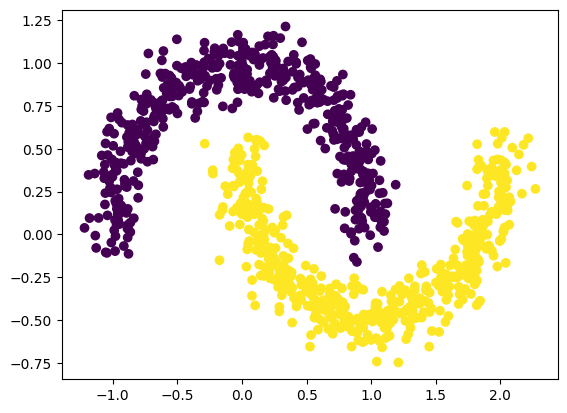

In [7]:
# Visualize the data on a scatter plot
import matplotlib.pyplot as plt
plt.scatter(data.X1,data.X2,c=y_moons)

In [8]:
# Turn data into tensors of dtype float
X=torch.from_numpy(X_moons).type(torch.float)
y=torch.from_numpy(y_moons).type(torch.float)
# Split the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=20,random_state=42)

In [9]:
X[:5],y[:5]

(tensor([[-0.0515,  0.4442],
         [ 1.0320, -0.4197],
         [ 0.8679, -0.2548],
         [ 0.2889, -0.4487],
         [-0.8334,  0.5351]]),
 tensor([1., 1., 1., 1., 0.]))

## 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
  * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [10]:
from torch import nn

Method 1 of defining the moons class

In [11]:
class MoonsModel(nn.Module):
    # constructor
    def __init__(self):
        super().__init__()
        #define layers
        self.layer_1=nn.Linear(in_features=2,out_features=10)
        self.layer_2=nn.Linear(in_features=10,out_features=10)
        self.layer_3=nn.Linear(in_features=10,out_features=1)
        self.relu=nn.ReLU()

    # computation function
    def forward(self,x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


Method 2

In [12]:
class MoonsModelV2(nn.Module):
    # constructor
    def __init__(self):
        super().__init__()
        #define layers
        self.layer=nn.Sequential(
            nn.Linear(in_features=2,out_features=10),
            nn.ReLU(),
            nn.Linear(in_features=10,out_features=10),
            nn.ReLU(),
            nn.Linear(in_features=10,out_features=1)
        )


    # computation function
    def forward(self,x):
        return self.layer(x)


Method 3 - VERIFY THIS AGAIN

In [13]:
class MoonsModelV3(nn.Module):
    # constructor
    NUM_FEATURES=2
    NUM_CLASSES=1
    HIDDEN_UNITS=10
    def __init__(self):
        super().__init__()
        #define layers
        self.layer=nn.Sequential(
            nn.Linear(in_features=NUM_FEATURES,out_features=HIDDEN_UNITS),
            nn.ReLU(),
            nn.Linear(in_features=HIDDEN_UNITS,out_features=HIDDEN_UNITS),
            nn.ReLU(),
            nn.Linear(in_features=HIDDEN_UNITS,out_features=1)
        )


    # computation function
    def forward(self,x):
        return self.layer(x)

In [14]:
# instantiate an object
model_1=MoonsModel().to(device)
#model_1(X_train)

In [15]:
import torch
from torch import nn

# Inherit from nn.Module to make a model capable of fitting the mooon data
class MoonModelV0(nn.Module):
    ## Your code here ##

    def forward(self, x):
        ## Your code here ##
        return

# Instantiate the model
## Your code here ##

## 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [16]:
# Setup loss function
loss_fn=nn.BCEWithLogitsLoss()
# Setup optimizer to optimize model's parameters
optimizer=torch.optim.SGD(model_1.parameters(),lr=0.1)

## 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
  * Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
  * To measure model accuray, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
  * Train the model for long enough for it to reach over 96% accuracy.
  * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [17]:
#sending data to device
X_train=X_train.to(device)
y_train=y_train.to(device)
X_test=X_test.to(device)
y_test=y_test.to(device)

In [18]:
X_train.shape,y_train.shape

(torch.Size([980, 2]), torch.Size([980]))

In [19]:
X_train.unsqueeze(dim=1).shape

torch.Size([980, 1, 2])

In [20]:
X_train.dtype

torch.float32

In [21]:
model_1(X_train.to(device))[0].shape

torch.Size([1])

In [22]:
# What's coming out of our model?

# logits (raw outputs of model)
print("Logits:")
## Your code here ##
logits=model_1(X_train)
print(logits[:5])
# Prediction probabilities
print("Pred probs:")
## Your code here ##
y_pred_probs=torch.sigmoid(logits)
print(y_pred_probs[:5])
# Prediction labels
print("Pred labels:")
## Your code here ##
y_pred_labels=torch.round(y_pred_probs)
print(y_pred_labels[:5])

Logits:
tensor([[0.2553],
        [0.2544],
        [0.3960],
        [0.2145],
        [0.2783]], device='cuda:0', grad_fn=<SliceBackward0>)
Pred probs:
tensor([[0.5635],
        [0.5633],
        [0.5977],
        [0.5534],
        [0.5691]], device='cuda:0', grad_fn=<SliceBackward0>)
Pred labels:
tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0', grad_fn=<SliceBackward0>)


In [23]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
!pip -q install torchmetrics # Colab doesn't come with torchmetrics

## TODO: Uncomment this code to use the Accuracy function

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 960.9/960.9 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.5 MB/s eta 0:00:00


In [24]:
from torchmetrics import Accuracy

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device
acc_fn

MulticlassAccuracy()

Missed the following

- I forgot to convert logits to pred probs and directly converted to pred labels which was wrong

I had the misunderstaning that i should not convert logits to pred probs when using BCEWithLogitsLoss but it was wrong.


```
# loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train)
loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
```
Here is the difference, when using BCEWithLogitsLoss, we dont need to use torch.sigmoid when passing to the loss function



In [27]:
epochs=1000
torch.manual_seed(42)
for epoch in range(epochs):
    # training loop
    model_1.train()

    # Forward pass
    # 1. get logits
    logits=model_1(X_train).squeeze(dim=1)
    # 2. get pred probs
    y_pred_probs=torch.sigmoid(logits)
    # 3. get pred labels
    y_pred_labels=torch.round(y_pred_probs)

    train_loss=loss_fn(logits,y_train)
    # did a mistake in the below line of code
    train_acc=acc_fn(y_train,y_pred_labels)
    # zero grad
    optimizer.zero_grad()

    # loss backward
    train_loss.backward()

    # step optimizer
    optimizer.step()

    # testing loop
    model_1.eval()

    with torch.inference_mode():
        test_logits=model_1(X_test).squeeze(dim=1)

        # missed this
        test_pred=torch.round(torch.sigmoid(test_logits))
        test_loss=loss_fn(test_logits,y_test)
        test_acc=acc_fn(y_test,test_pred)

    # printing
    if epoch%10==0:
        print(f'Epoch: {epoch}, Train loss: {train_loss}, Train accuracy: {train_acc}, Test loss: {test_loss}, Test_accuracy: {test_acc}')

Epoch: 0, Train loss: 0.6757984757423401, Train accuracy: 0.5, Test loss: 0.671190083026886, Test_accuracy: 0.5
Epoch: 10, Train loss: 0.6482470631599426, Train accuracy: 0.5, Test loss: 0.648016631603241, Test_accuracy: 0.5
Epoch: 20, Train loss: 0.6179172992706299, Train accuracy: 0.8173469305038452, Test loss: 0.6227309107780457, Test_accuracy: 0.6499999761581421
Epoch: 30, Train loss: 0.579845666885376, Train accuracy: 0.8377550840377808, Test loss: 0.5911152958869934, Test_accuracy: 0.699999988079071
Epoch: 40, Train loss: 0.5328869223594666, Train accuracy: 0.8500000238418579, Test loss: 0.5522908568382263, Test_accuracy: 0.75
Epoch: 50, Train loss: 0.4808120131492615, Train accuracy: 0.8469387888908386, Test loss: 0.5103086233139038, Test_accuracy: 0.800000011920929
Epoch: 60, Train loss: 0.4306177496910095, Train accuracy: 0.8418367505073547, Test loss: 0.4694270193576813, Test_accuracy: 0.800000011920929
Epoch: 70, Train loss: 0.3879254162311554, Train accuracy: 0.844897985458

In [28]:
## TODO: Uncomment this to set the seed
# torch.manual_seed(RANDOM_SEED)

# Setup epochs


# Send data to the device


# Loop through the data
# for epoch in range(epochs):
  ### Training


  # 1. Forward pass (logits output)

  # Turn logits into prediction probabilities


  # Turn prediction probabilities into prediction labels


  # 2. Calculaute the loss
  # loss = loss_fn(y_logits, y_train) # loss = compare model raw outputs to desired model outputs

  # Calculate the accuracy
  # acc = acc_fn(y_pred, y_train.int()) # the accuracy function needs to compare pred labels (not logits) with actual labels

  # 3. Zero the gradients


  # 4. Loss backward (perform backpropagation) - https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights.

  # 5. Step the optimizer (gradient descent) - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression)


  ### Testing
  # model_0.eval()
  # with torch.inference_mode():
    # 1. Forward pass (to get the logits)

    # Turn the test logits into prediction labels


    # 2. Caculate the test loss/acc


  # Print out what's happening every 100 epochs
  # if epoch % 100 == 0:

## 5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

In [29]:
# Plot the model predictions
import numpy as np

def plot_decision_boundary(model, X, y):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

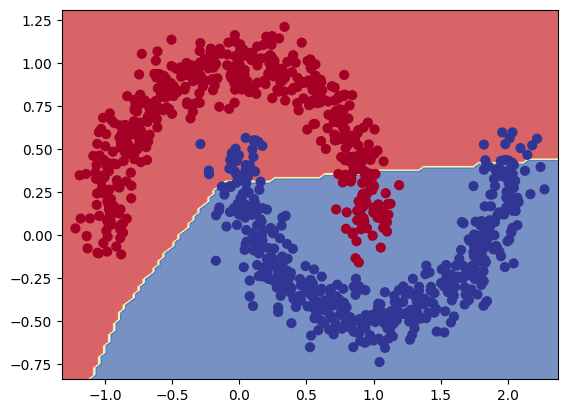

In [30]:
# Plot decision boundaries for training and test sets
plot_decision_boundary(model_1,X_train,y_train)

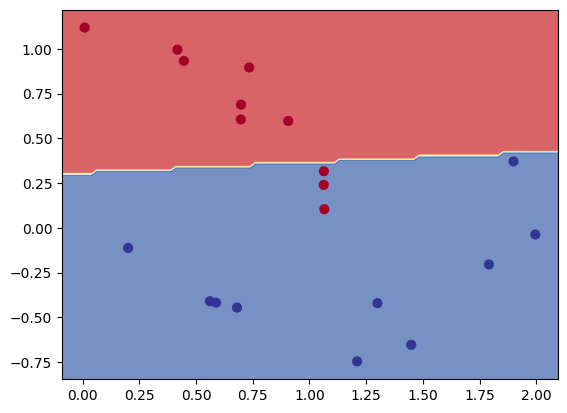

In [31]:
plot_decision_boundary(model_1,X_test,y_test)

## 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
  * Feel free to reference the [ML cheatsheet website](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) for the formula.

In [32]:
# Create a straight line tensor
line=torch.arange(-100,100,1)
line.shape

torch.Size([200])

In [33]:
# Test torch.tanh() on the tensor and plot it
tanh=torch.tanh(line)

In [34]:
import matplotlib.pyplot as plt

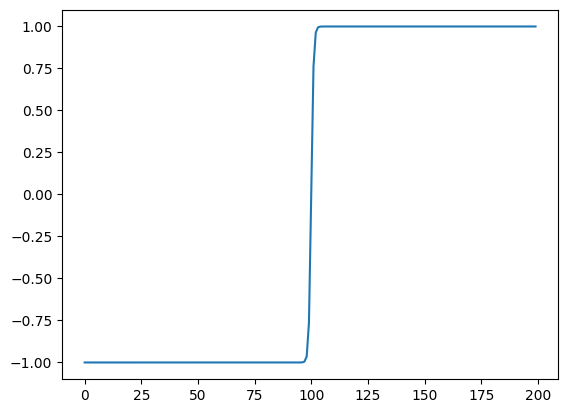

In [35]:
plt.plot(tanh)

In [36]:
# Replicate torch.tanh() and plot it
def tanh(x):
    return (torch.exp(x)-torch.exp(-x))/(torch.exp(x)+torch.exp(-x))

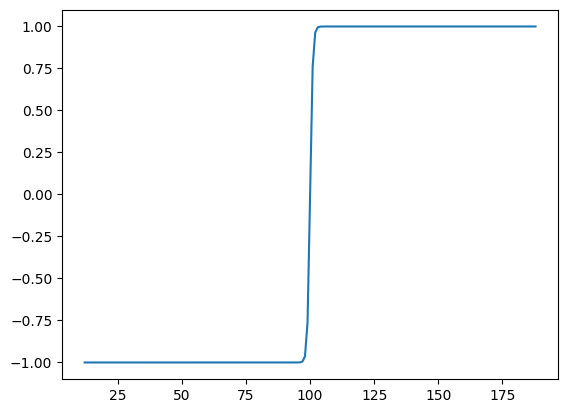

In [37]:
tanh_hand=tanh(line)
plt.plot(tanh_hand)

## 7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).
  * Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
  * Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
  * Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
  * Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like) - 1000 epochs should be plenty.
  * Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

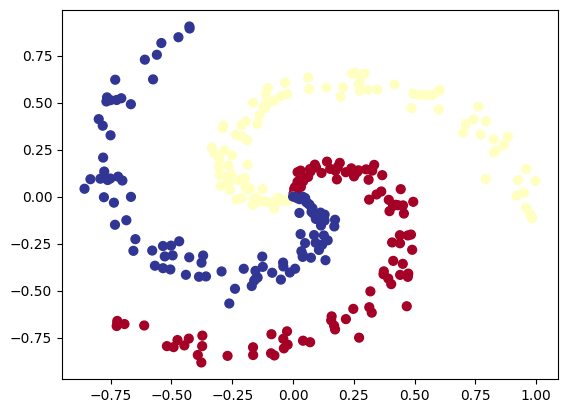

In [45]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

Remember this that in multi class classification, labels `y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long`


In [46]:
# Turn data into tensors
import torch
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [47]:
X_train[0]

tensor([ 0.0396, -0.3208])

In [43]:
# Let's calculuate the accuracy for when we fit our model
!pip -q install torchmetrics # colab doesn't come with torchmetrics
from torchmetrics import Accuracy

## TODO: uncomment the two lines below to send the accuracy function to the device
acc_fn = Accuracy(task="multiclass", num_classes=4).to(device)
acc_fn

MulticlassAccuracy()

In [50]:
# Prepare device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

# Create model by subclassing nn.Module
class SpiralModel(nn.Module):
    def __init__(self,NUM_FEATURES,HIDDEN_UNITS,NUM_CLASSES):
        super().__init__()
        self.layer=nn.Sequential(
            nn.Linear(in_features=NUM_FEATURES,out_features=HIDDEN_UNITS),
            nn.ReLU(),
            nn.Linear(in_features=HIDDEN_UNITS,out_features=HIDDEN_UNITS),
            nn.ReLU(),
            nn.Linear(in_features=HIDDEN_UNITS,out_features=NUM_CLASSES)
        )
    def forward(self,x):
        return self.layer(x)


# Instantiate model and send it to device
model_1=SpiralModel(2,10,3).to(device)

Forgot dim `y_pred_probs=torch.softmax(logits,dim=1)`

and here also
`y_pred_labels=torch.argmax(y_pred_probs,dim=1)`

In [54]:
# Setup data to be device agnostic
X_train=X_train.to(device)
X_test=X_test.to(device)
y_train=y_train.to(device)
y_test=y_test.to(device)
# Print out first 10 untrained model outputs (forward pass)
print("Logits:")
## Your code here ##
logits=model_1(X_train)
print(logits[:10])
print("Pred probs:")
## Your code here ##
y_pred_probs=torch.softmax(logits,dim=1)
print(y_pred_probs[:10])
print("Pred labels:")
## Your code here ##
y_pred_labels=torch.argmax(y_pred_probs,dim=1)
print(y_pred_labels[:10])

Logits:
tensor([[-0.3621, -0.2138, -0.2310],
        [-0.3614, -0.2079, -0.2221],
        [-0.3471, -0.2292, -0.2296],
        [-0.2831, -0.2908, -0.2104],
        [-0.2988, -0.2787, -0.2243],
        [-0.3317, -0.2429, -0.2223],
        [-0.3408, -0.2369, -0.2274],
        [-0.3587, -0.2284, -0.2479],
        [-0.3358, -0.2374, -0.2223],
        [-0.2822, -0.2918, -0.2104]], device='cuda:0',
       grad_fn=<SliceBackward0>)
Pred probs:
tensor([[0.3030, 0.3515, 0.3455],
        [0.3016, 0.3517, 0.3467],
        [0.3077, 0.3462, 0.3461],
        [0.3260, 0.3235, 0.3506],
        [0.3228, 0.3294, 0.3478],
        [0.3117, 0.3406, 0.3477],
        [0.3096, 0.3435, 0.3468],
        [0.3071, 0.3498, 0.3431],
        [0.3102, 0.3423, 0.3475],
        [0.3263, 0.3232, 0.3506]], device='cuda:0', grad_fn=<SliceBackward0>)
Pred labels:
tensor([1, 1, 1, 2, 2, 2, 2, 1, 2, 2], device='cuda:0')


In [57]:
# Setup loss function and optimizer
loss_fn =nn.CrossEntropyLoss()
optimizer =torch.optim.SGD(model_1.parameters(),lr=0.1)

In [62]:
# Build a training loop for the model
epochs=1000
# Loop over data
for epoch in range(epochs):

  ## Training
  model_1.train()

  # 1. Forward pass
  logits=model_1(X_train)
  y_pred_probs=torch.softmax(logits,dim=1)
  y_pred_labels=torch.argmax(y_pred_probs,dim=1)

  # 2. Calculate the loss
  train_loss=loss_fn(logits,y_train)
  train_acc=acc_fn(y_train,y_pred_labels)
  # 3. Optimizer zero grad
  optimizer.zero_grad()
  # 4. Loss backward
  train_loss.backward()
  # 5. Optimizer step
  optimizer.step()

  ## Testing
  with torch.inference_mode():
    model_1.eval()
    # 1. Forward pass
    test_logits=model_1(X_test)
    test_pred_prob=torch.softmax(test_logits,dim=1)
    test_pred_labels=torch.argmax(test_pred_prob,dim=1)
    # 2. Caculate loss and acc
    test_loss=loss_fn(test_logits,y_test)
    test_acc=acc_fn(y_test,test_pred_labels)
  # Print out what's happening every 100 epochs
    if epoch%10==0:
        print(f'Epoch: {epoch}, Train loss: {train_loss}, Train accuracy: {train_acc}, Test loss: {test_loss}, Test_accuracy: {test_acc}')

Epoch: 0, Train loss: 1.037179708480835, Train accuracy: 0.512499988079071, Test loss: 1.0300920009613037, Test_accuracy: 0.5
Epoch: 10, Train loss: 1.024672031402588, Train accuracy: 0.5083333253860474, Test loss: 1.016080379486084, Test_accuracy: 0.4833333194255829
Epoch: 20, Train loss: 1.0109320878982544, Train accuracy: 0.5083333253860474, Test loss: 1.0006901025772095, Test_accuracy: 0.46666666865348816
Epoch: 30, Train loss: 0.9960672855377197, Train accuracy: 0.5041666626930237, Test loss: 0.9842826128005981, Test_accuracy: 0.4833333194255829
Epoch: 40, Train loss: 0.9805400967597961, Train accuracy: 0.5041666626930237, Test loss: 0.9674620032310486, Test_accuracy: 0.4833333194255829
Epoch: 50, Train loss: 0.9647672176361084, Train accuracy: 0.5041666626930237, Test loss: 0.951126754283905, Test_accuracy: 0.4833333194255829
Epoch: 60, Train loss: 0.9492865800857544, Train accuracy: 0.5041666626930237, Test loss: 0.935226321220398, Test_accuracy: 0.4833333194255829
Epoch: 70, Tr

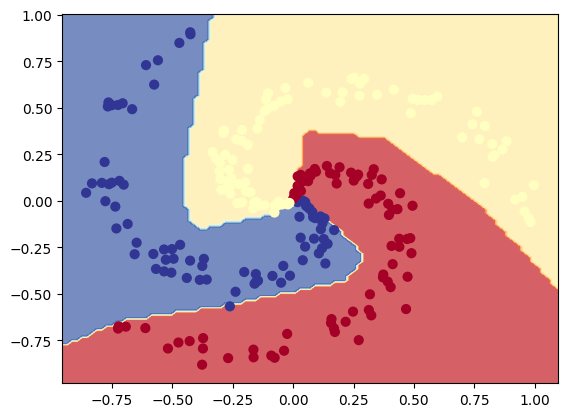

In [63]:
# Plot decision boundaries for training and test sets
plot_decision_boundary(model_1,X_train,y_train)

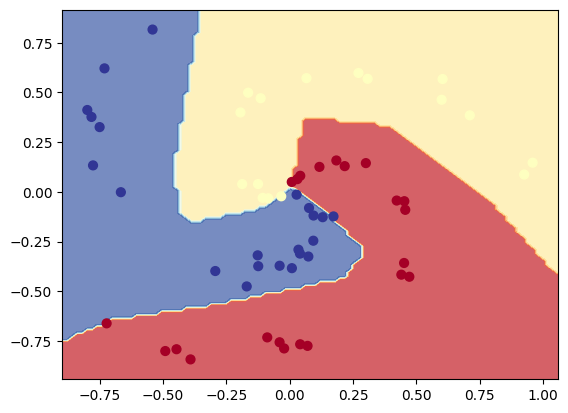

In [64]:
plot_decision_boundary(model_1,X_test,y_test)

Im getting confused when calculting loss function and accuarcy i.e. when to use raw logits and when to use prediction labels